In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM  # perform F test
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

import selective_recruitment.globals as gl
# import Functional_Fusion.Functional_Fusion.dataset as ds 

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting the directories
behav_dir = 'A:\\data\\Cerebellum\\CerebellumWorkingMemory\\data\\fmri'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'

# Analysis of Behvioral performance inside the scanner

## Motor task

In [82]:
# # get the behavioral dataframe
df = pd.read_csv(behav_dir + "/df_fs.tsv", sep = "\t")
print(df.columns)

D_fs = pd.DataFrame()
D_fs["sn"] = df.sn
D_fs["Force"] = df["ForceB"].map({1: "L", 2: "M", 3: "H"})
D_fs["Speed"] = df["SpeedB"].map({1: "L", 2: "M", 3: "H"})
D_fs["isError"] = df["isError"]
D_fs["cond_name"] = D_fs["Force"]+"F" + "_" + D_fs["Speed"] + "S"
D_fs["PeakForce"] = df["PeakForce"].astype(float)
D_fs["NumPress"] = df["numPress"].astype(int)
D_fs["MT"] = df["MT"].astype(float)

D_fs["isCorrect"] = 1 - D_fs["isError"] 

# set the colors
colors = ["gray", "b", "b", "r", "r"]

Index(['sn', 'run', 'startTime', 'startTimeReal', 'startTR', 'startTRTime',
       'announceTime', 'feedbackTime', 'timeTrial', 'isError2', 'seqType',
       'exec', 'wmType', 'ForceL', 'ForceB', 'SpeedB', 'PeakForce', 'numPress',
       'MT', 'isError'],
      dtype='object')


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  1.7528 3.0000 45.0000 0.1698



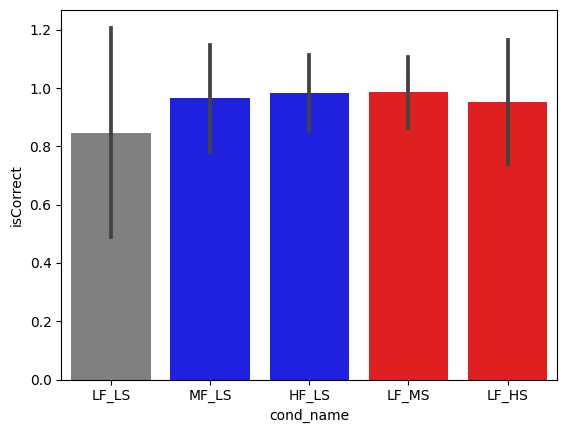

In [95]:
plotvar = "isCorrect"
cond_order = ['LF_LS', 'MF_LS', 'HF_LS', 'LF_MS', 'LF_HS']
ax = sns.barplot(data = D_fs, x = "cond_name", y =  plotvar, 
                 order = cond_order, errorbar="sd", palette = colors)

plt.setp(ax.collections, alpha=.8)
plt.savefig("fs_behaviour_percent_correct.pdf")
print(AnovaRM(data=D_fs.loc[(D_fs.Force != "L")|(D_fs.Speed != "L")], depvar=plotvar,subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name 61.9304 4.0000 60.0000 0.0000



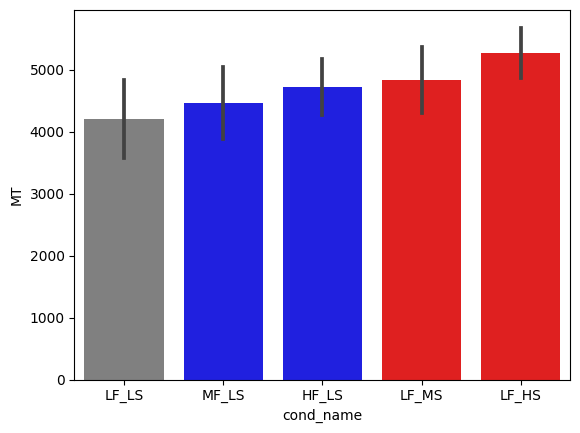

In [84]:
plotvar = "MT"
cond_order = ['LF_LS', 'MF_LS', 'HF_LS', 'LF_MS', 'LF_HS']
ax = sns.barplot(data = D_fs.loc[D_fs.isCorrect == 1], x = "cond_name", y =  plotvar, 
                 order = cond_order, errorbar="sd", palette = colors)

plt.setp(ax.collections, alpha=.8)
plt.savefig("fs_behaviour_movement_time.pdf")
print(AnovaRM(data=D_fs.loc[D_fs.isCorrect == 1], depvar=plotvar,subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())


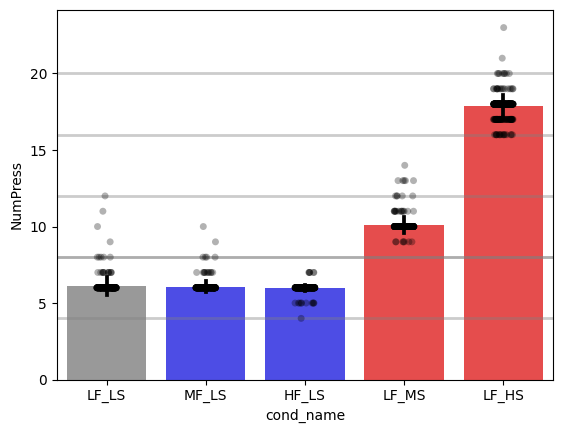

In [89]:
ax = sns.barplot(
    x="cond_name", 
    y="NumPress", 
    data=D_fs.loc[D_fs.isCorrect == 1], 
    # edgecolor="black",
    errcolor="black",
    palette = colors,
    alpha=0.8, 
    errorbar="sd",
    order = cond_order
)

sns.stripplot(
    x="cond_name", 
    y="NumPress",
    palette = ["k"], 
    legend = False, 
    hue="cond_name", 
    order = cond_order, 
    data=D_fs.loc[D_fs.isCorrect == 1],
    dodge=False, alpha=0.3, ax=ax
)

# low speed
x1 = 4
x2 = 8
ax.axhline(x1, color='gray', lw=2, alpha=0.4)
ax.axhline(x2, color='gray', lw=2, alpha=0.4)

# medium speed
x1 = 8
x2 = 12
ax.axhline(x1, color='gray', lw=2, alpha=0.4)
ax.axhline(x2, color='gray', lw=2, alpha=0.4)

# high speed
x1 = 16
x2 = 20
ax.axhline(x1, color='gray', lw=2, alpha=0.4)
ax.axhline(x2, color='gray', lw=2, alpha=0.4)

plt.savefig("fs_peak_speed.pdf")

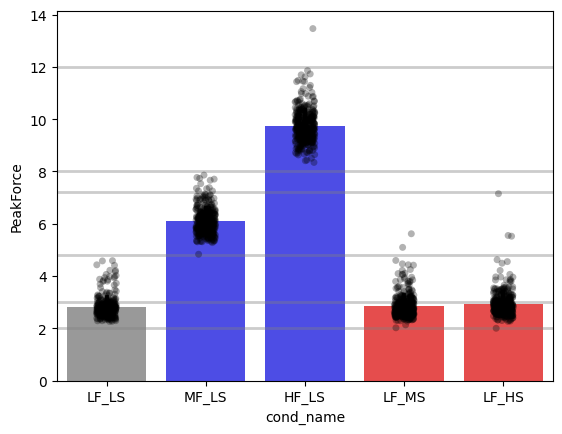

In [86]:
ax = sns.barplot(
    x="cond_name", 
    y="PeakForce", 
    data=D_fs.loc[D_fs.isCorrect == 1], 
    # edgecolor="black",
    errcolor="black",
    palette = colors,
    alpha=0.8, 
    errorbar="sd",
    order = cond_order
)

sns.stripplot(
    x="cond_name", 
    y="PeakForce",
    palette = ["k"], 
    legend = False, 
    hue="cond_name", 
    order = cond_order, 
    data=D_fs.loc[D_fs.isCorrect == 1],
    dodge=False, alpha=0.3, ax=ax
)


# plotting the force area ontop
# Low force    :2.5*0.8 - 2.5*1.2: 2 - 3
# Medium force :6*0.8 - 6*1.2: 4.8 - 7.2
# High force   :10*0.8 - 10*1.2: 8 - 12

x1 = 2
x2 = 3
ax.axhline(x1, color='gray', lw=2, alpha=0.4)
ax.axhline(x2, color='gray', lw=2, alpha=0.4)

x1 = 4.8
x2 = 7.2
ax.axhline(x1, color='gray', lw=2, alpha=0.4)
ax.axhline(x2, color='gray', lw=2, alpha=0.4)

x1 = 8
x2 = 12
ax.axhline(x1, color='gray', lw=2, alpha=0.4)
ax.axhline(x2, color='gray', lw=2, alpha=0.4)

plt.savefig("fs_peak_force.pdf")


## Alternative plotting
THIS IS JUST ANOTHER WAY OF VISUALIZING THE BEHAVIORAL PERFORMANCE

two separate plots one for force and one for speed, with baseline included in each

In [ ]:
# get force and speed data separately
D_fs_force = D_fs.loc[D_fs.Speed == "L"]
D_fs_speed = D_fs.loc[D_fs.Force == "L"]

#### Accuracy of Performance plot

In [ ]:
# create two panels for plots using subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# plot the % correct for force
sns.barplot(data = D_fs_force, x = "Force", y =  "isCorrect", order = ["L", "M", "H"], ax = axes[0], palette = ["gray", "b", "b"])
axes[0].set_title("Force")
axes[0].set_ylabel("Percent correct")

plt.setp(axes[0].collections, alpha=.8)

# plot the % correct for speed
sns.barplot(data = D_fs_speed, x = "Speed", y =  "isCorrect", order = ["L", "M", "H"], ax = axes[1], palette = ["gray", "r", "r"])
axes[1].set_title("Speed")
axes[1].set_ylabel("Percent correct")

plt.setp(axes[1].collections, alpha=.8)
